<a href="https://colab.research.google.com/github/Ruchiraongithub/LGMVIP--DataScience/blob/main/Fashion_items_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
# Load and prepare the Fashion MNIST dataset
fashionmnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashionmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


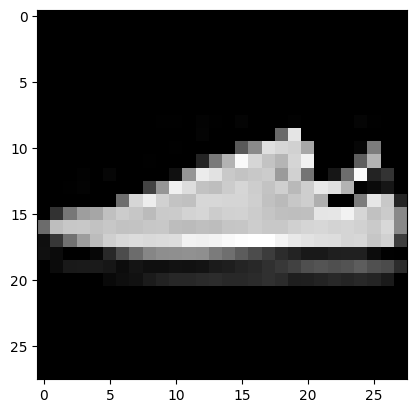

In [ ]:
plt.imshow(train_images[6],cmap='gray')
plt.show()

In [ ]:
print(train_labels[6])

7


In [ ]:
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [ ]:
#Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Add Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
#Compile and train the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Model Training
history = model.fit(train_images,train_labels,epochs=10,
                    validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.7483 - loss: 0.6959 - val_accuracy: 0.8677 - val_loss: 0.3658
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.8776 - loss: 0.3373 - val_accuracy: 0.8869 - val_loss: 0.3185
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8967 - loss: 0.2833 - val_accuracy: 0.8920 - val_loss: 0.2962
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9088 - loss: 0.2474 - val_accuracy: 0.8975 - val_loss: 0.2877
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9172 - loss: 0.2211 - val_accuracy: 0.8996 - val_loss: 0.2816
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9259 - loss: 0.1970 - val_accuracy: 0.9000 - val_loss: 0.2847
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9322 - loss: 0.1815 - val_accuracy: 0.9005 - val_loss: 0.2976
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9399 - loss: 0.16

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest Accuracy:',test_acc)

313/313 - 3s - 8ms/step - accuracy: 0.8981 - loss: 0.3494

Test Accuracy: 0.8981000185012817


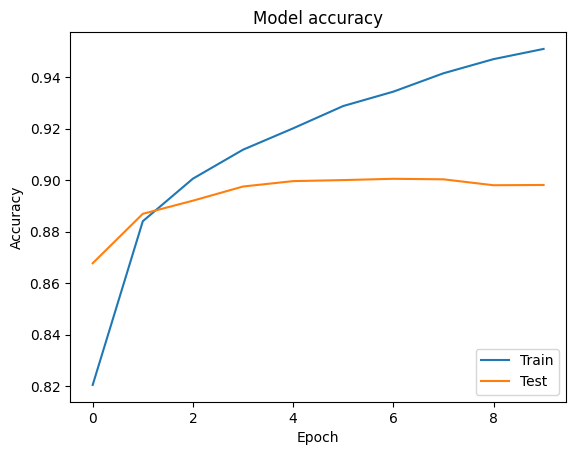

In [ ]:
#Plot training and Validation accuracy values
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='lower right')
plt.show()